# ANN for regression

In [119]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14872\2729461129.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# A function that creates and trains the model

In [120]:
def model_create_and_train(x, y):
    # build model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
    # learning rate
    learningRate = .05

    # loss function
    lossfun = nn.MSELoss()

    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    # train the model
    numepochs = 500
    losses = torch.zeros(numepochs)
    ## Train the model!
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # show the losses

    # manually compute losses
    # final forward pass
    predictions = ANNreg(x)

    return predictions, losses


# A function that creates the data

In [121]:
# create data
def create_data(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return x, y

# Test once

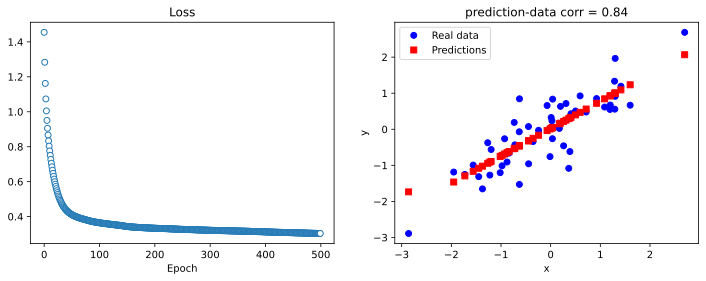

In [122]:
# create a dataset
x,y = create_data(.8)

# run the model
yHat,losses = model_create_and_train(x,y)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()

# Test with different slopes

In [123]:
slopes = np.linspace(-2, 2, 21)
exps = 50
losses = np.zeros((len(slopes), exps))
preds = np.zeros((len(slopes), exps))

for slope in range(len(slopes)):
    for exp in range(exps):
        # create a dataset
        x,y = create_data(slopes[slope])
        # run the model
        yHat,loss = model_create_and_train(x,y)
        yHat = yHat.detach()
        preds[slope][exp],losses[slope][exp] = np.corrcoef(y.T,yHat.T)[0,1], loss[-1]
# fixing all the points that the model is stuck at local minimum
preds[np.isnan(preds)], losses[np.isnan(losses)] = 0, 0
    

# plot the results


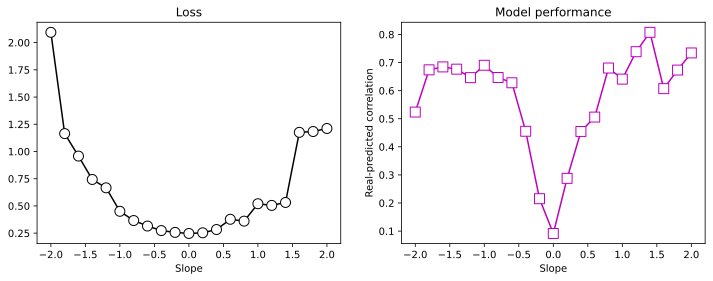

In [124]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(losses[:,:],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(preds[:,:],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()